In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 

  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/Users/williamfigura/miniconda3/envs/cs178/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [34]:
print(X.shape)

(101766, 47)


In [35]:
import numpy as np
import matplotlib.pyplot as plt

seed = 1234
np.random.seed(seed) 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#drop columns with NA values
X = X.dropna(axis=1)

y = np.ravel(y)

#learned that I need to encode labels
columns_object = X.select_dtypes(include=['object']).columns.tolist()

labelEncoder = LabelEncoder()
for column in columns_object:
    X.loc[:, column] = labelEncoder.fit_transform(X.loc[:, column])

# Split data into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

# Further split training/validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=seed, shuffle=True)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


learning_rates = [0.001, 0.005, 0.01]
hidden_layers = [8, 16, 32, 64, 128]
regularization = [0.01, 0.1, 1.0]
activation_functions = ['logistic', 'tanh', 'relu']
batch_sizes = [128, 256]

dictionary_of_training = {'learning_rates': [], 'hidden_layers': [], 'regularization': [], 'activation_functions': [], 'batch_sizes': [], 'Training error_rate': [], 'Training accuracy': [], 'Testing error_rate': [], 'Testing accuracy': []}

#we test different learning_rates, hidden_layers, regularization, activation_functions, batch_sizes

for activation_function in activation_functions:
    for hidden_layer in hidden_layers:
        for alpha in regularization:
            for batch_size in batch_sizes:
                for learning_rate in learning_rates:
                    classifier = MLPClassifier(hidden_layer_sizes=hidden_layer, activation=activation_function, solver='adam', alpha = alpha, batch_size=batch_size, learning_rate_init=learning_rate, random_state=seed, n_iter_no_change=100, max_iter=1000)
                    classifier.fit(X_train, y_train)
                    training_accuracy = classifier.score(X_train, y_train)
                    training_error_rate = 1 - training_accuracy
                    testing_accuracy = classifier.score(X_val, y_val)
                    testing_error_rate = 1 - testing_accuracy
                    dictionary_of_training['learning_rates'].append(learning_rate)
                    dictionary_of_training['hidden_layers'].append(hidden_layer)
                    dictionary_of_training['regularization'].append(alpha)
                    dictionary_of_training['activation_functions'].append(activation_function)
                    dictionary_of_training['batch_sizes'].append(batch_size)
                    dictionary_of_training['Training error_rate'].append(training_error_rate)
                    dictionary_of_training['Training accuracy'].append(training_accuracy)
                    dictionary_of_training['Testing error_rate'].append(testing_error_rate)
                    dictionary_of_training['Testing accuracy'].append(testing_accuracy)
                    print("Done")

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [40]:
import pandas as pd

#this prints the table
resulting_pd = pd.DataFrame(dictionary_of_training)

In [43]:
smallest_error_index = resulting_pd['Testing error_rate'].idxmin()
smallest_error = resulting_pd.iloc[smallest_error_index]
classifier = MLPClassifier(hidden_layer_sizes= smallest_error['hidden_layers'], activation= smallest_error['activation_functions'],alpha= smallest_error['regularization'],batch_size= smallest_error['batch_sizes'],learning_rate_init= smallest_error['learning_rates'], solver='adam', random_state=seed, n_iter_no_change=100, max_iter=1000)
classifier.fit(X_train, y_train)
error = 1 - classifier.score(X_test, y_test)
print(f"Final Testing Error: {error}")
print(smallest_error)

Final Testing Error: 0.4154465952638302
learning_rates             0.001
hidden_layers                 64
regularization               0.1
activation_functions    logistic
batch_sizes                  128
Training error_rate     0.416302
Training accuracy       0.583698
Testing error_rate      0.413944
Testing accuracy        0.586056
Name: 60, dtype: object


In [46]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_features = [None, 'sqrt', 'log2']
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 4]

dictionary_of_training = {'criterion': [], 'splitter': [], 'max_features': [], 'min_samples_split': [], 'min_samples_leaf': [], 'Training error_rate': [], 'Training accuracy': [], 'Testing error_rate': [], 'Testing accuracy': []}

for criteria in criterion:
    for split in splitter:
        for max_feature in max_features:
            for min_sample_split in min_samples_split:
                for min_sample_leaf in min_samples_leaf:
                    classifier = DecisionTreeClassifier(random_state = seed, criterion = criteria, splitter = split, max_features = max_feature, min_samples_split = min_sample_split, min_samples_leaf = min_sample_leaf)
                    classifier.fit(X_train, y_train)
                    training_accuracy = classifier.score(X_train, y_train)
                    training_error_rate = 1 - training_accuracy
                    testing_accuracy = classifier.score(X_val, y_val)
                    testing_error_rate = 1 - testing_accuracy
                    dictionary_of_training['criterion'].append(criteria)
                    dictionary_of_training['splitter'].append(split)
                    dictionary_of_training['max_features'].append(max_feature)
                    dictionary_of_training['min_samples_split'].append(min_sample_split)
                    dictionary_of_training['min_samples_leaf'].append(min_sample_leaf)
                    dictionary_of_training['Training error_rate'].append(training_error_rate)
                    dictionary_of_training['Training accuracy'].append(training_accuracy)
                    dictionary_of_training['Testing error_rate'].append(testing_error_rate)
                    dictionary_of_training['Testing accuracy'].append(testing_accuracy)

In [50]:
import pandas as pd

#this prints the table
resulting_pd = pd.DataFrame(dictionary_of_training)

In [52]:
smallest_error_index = resulting_pd['Testing error_rate'].idxmin()
smallest_error = resulting_pd.iloc[smallest_error_index]
classifier = DecisionTreeClassifier(random_state = seed, criterion = smallest_error['criterion'], splitter = smallest_error['splitter'], max_features = smallest_error['max_features'], min_samples_split = smallest_error['min_samples_split'], min_samples_leaf = smallest_error['min_samples_leaf'])
classifier.fit(X_train, y_train)
error = 1 - classifier.score(X_test, y_test)
print(f"Final Testing Error: {error}")
print(smallest_error)

Final Testing Error: 0.4653630735973273
criterion               entropy
splitter                 random
max_features               sqrt
min_samples_split             2
min_samples_leaf              4
Training error_rate    0.399024
Training accuracy      0.600976
Testing error_rate     0.460178
Testing accuracy       0.539822
Name: 92, dtype: object


<Axes: xlabel='max_features', ylabel='criterion'>

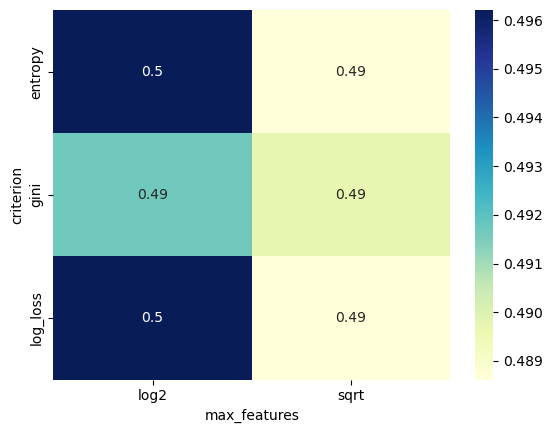

In [60]:
import seaborn as sns
import pandas as pd

# Convert the dictionary_of_training to a DataFrame
df = pd.DataFrame(dictionary_of_training)

# Pivot the DataFrame to create a heatmap
heatmap_data = df.pivot_table(index='criterion', columns='max_features', values='Testing accuracy')

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

<Axes: xlabel='min_samples_leaf', ylabel='min_samples_split'>

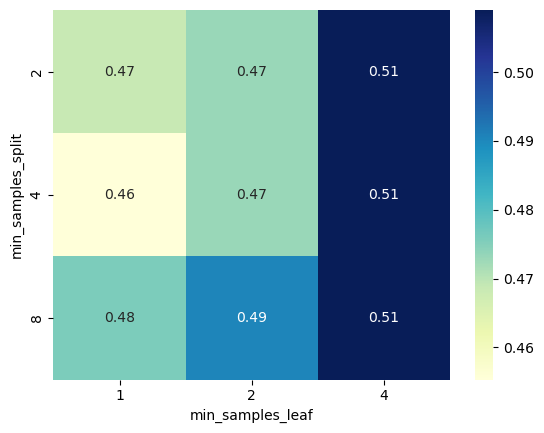

In [61]:
import seaborn as sns
import pandas as pd

# Convert the dictionary_of_training to a DataFrame
df = pd.DataFrame(dictionary_of_training)

# Pivot the DataFrame to create a heatmap
heatmap_data = df.pivot_table(index='min_samples_split', columns='min_samples_leaf', values='Testing accuracy')

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")